In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import edward as ed
import numpy as np
import tensorflow as tf


In [2]:

from edward.models import Bernoulli, Beta
ed.set_seed(42)


In [18]:
import edward as ed

In [22]:
ed.dot?

In [51]:

# DATA
N=20
p0 = 0.2
p1 = 0.8
x_data = np.random.choice([0,1],N,p=[1-p0,p0])
y_data = np.random.choice([0,1],N,p=[1-p1,p1])

# MODEL
p = Beta(a=1.0, b=1.0)
x = Bernoulli(p=ed.dot(np.eye(N,dtype=np.float32),tf.ones(N) * p))
y = Bernoulli(p=ed.dot(np.eye(N,dtype=np.float32),tf.ones(N) * p))
#x_data_ph = tf.placeholder(tf.int32,shape = N)
#y_data_ph = tf.placeholder(tf.int32,shape = N)
#x = ed.models.Gamma(alpha = tf.ones(N) * p, beta = 1.0)
#xmsk = ed.dot(np.eye(N,dtype=np.float32),x)

In [40]:
#x = ed.models.Gamma

In [70]:
# INFERENCE
qp_a = tf.nn.softplus(tf.Variable(tf.random_normal([])))
qp_b = tf.nn.softplus(tf.Variable(tf.random_normal([])))
qx = Bernoulli(p=tf.nn.sigmoid(tf.Variable(tf.zeros(N))))
qp = Beta(a=qp_a, b=qp_b)

#inference_x = ed.KLqp({p: qp}, data={x: x_data})
#inference_y = ed.KLqp({p: qp}, data={y: y_data})
inference = ed.KLqp({p: qp})#,data = {x:x_data_ph,y:y_data_ph})

#inference.run(n_iter=500)

In [80]:
inference.initialize()

tf.global_variables_initializer().run()

for _ in range(1000):
      info_dict = inference.update(feed_dict={x:x_data})
      inference.print_progress(info_dict)
      #info_dict = inference.update(feed_dict={x:x_data})
      #inference.print_progress(info_dict)

inference.finalize()

1000/1000 [100%] ██████████████████████████████ Elapsed: 1s | Loss: 0.000


In [81]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([  99.,  105.,  106.,  108.,   95.,   94.,  102.,   92.,   91.,  108.]),
 array([ 0.00388778,  0.10345309,  0.2030184 ,  0.30258371,  0.40214902,
         0.50171432,  0.60127963,  0.70084494,  0.80041025,  0.89997556,
         0.99954087]),
 <a list of 10 Patch objects>)

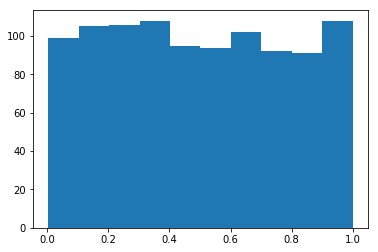

In [82]:
plt.hist(qp.sample(1000).eval())

In [13]:
np.arange(N)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [14]:
qp_a.eval()

1.0000001